In [180]:
import pandas as pd
import seaborn as sns

In [181]:
pd.set_option("max_columns", 80)

In [182]:
df = pd.read_csv('data/interim_data/cdc_data_cleaned.csv')

In [183]:
df.head()

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year_data_collected,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,RESIDENTS,Not Available,February,37,"Hospital, clinic or Medical Center",Married,Tuesday,2015,Natural,No,Not Available,O268,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",4,11O268,21O995,31O268,2,O268,O903,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
1,RESIDENTS,Not Available,January,56,"Hospital, clinic or Medical Center",Widowed,Tuesday,2015,Natural,No,Not Available,O268,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O268,21O971,31O971,2,O268,O971,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
2,RESIDENTS,Not Available,March,31,Other,Married,Tuesday,2015,Natural,No,Not Available,O881,Obstetric embolism,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O993,21O881,Not Available,1,O881,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
3,INTRASTATE NONRESIDENTS,Not Available,April,24,"Hospital, clinic or Medical Center",Divorced,Thursday,2015,Not Available,Unknown,Not Available,O065,Other and unspecified pregnancy with abortive ...,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",2,11O080,21O069,Not Available,1,O065,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
4,INSTRASTATE NONRESIDENTS,Not Available,July,28,"Hospital, clinic or Medical Center","Never married, Single",Saturday,2015,Natural,No,Not Available,O998,Indirect obstetric deaths,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O994,21O998,Not Available,2,O998,O994,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black


In [184]:
df['race'].unique()

array(['Black', 'White', 'American Indian (includes Aleuts and Eskimos)',
       'Chinese', 'Filipino', 'Asian Indian',
       'Other Asian or Pacific Islander in areas reporting codes 18-58',
       'Combined other Asian or Pacific Islander, includes codes 18-68',
       'Japanese', 'Vietnamese', 'Korean',
       'Hawaiian (includes Part-Hawaiian)', 'Guamanian', 'Samoan'],
      dtype=object)

In [185]:
df['race_recode_3'].unique()

array(['Black', 'White', 'Races other than White or Black'], dtype=object)

In [186]:
df['race_recode_5'].unique()

array(['Black', 'White', 'American Indian', 'Asian or Pacific Islander'],
      dtype=object)

In [187]:
df['hispanic_origin'].unique()

array(['Non – Hispanic', 'Mexican', 'South American', 'Central American',
       'Puerto Rican', 'Unknown', 'Central and South American',
       'Other Hispanic', 'Latin American', 'Cuban', 'Dominican'],
      dtype=object)

In [188]:
df.shape

(5346, 29)

In [189]:
df[df['hispanic_origin'] == 'Non – Hispanic'].count()

resident_status                                        4545
level_of_education                                     4545
month_of_death                                         4545
age                                                    4545
place_of_death_patient_status                          4545
marital_status                                         4545
day_of_week_of_death                                   4545
year_data_collected                                    4545
manner_of_death                                        4545
was_autopsy_done                                       4545
place_of_injury_for_icd_w00_y34_except_y06_and_y07_    4545
icd_code_10th_revision                                 4545
358_causes_of_death                                    4545
113_causes_of_death                                    4545
130_causes_of_infant_death                             4545
39_cause_recode                                        4545
number_of_entity_axis_conditions        

In [190]:
df['manner_of_death'].unique()

array(['Natural', 'Not Available', 'Could not determine',
       'Pending investigation', 'Accident', 'Homicide', 'Suicide'],
      dtype=object)

In [191]:
df['race_recode_3'].describe()

count      5346
unique        3
top       White
freq       3289
Name: race_recode_3, dtype: object

In [192]:
df.shape

(5346, 29)

In [193]:
column_name = 'race_recode_3'

df_grouped_by_race = df.groupby(df[column_name]).size()
df_grouped_by_race

race_recode_3
Black                              1749
Races other than White or Black     308
White                              3289
dtype: int64

3417 rows in dataset => 3417 deaths
1108 black women deaths
2113 white women deaths
196 other races deaths

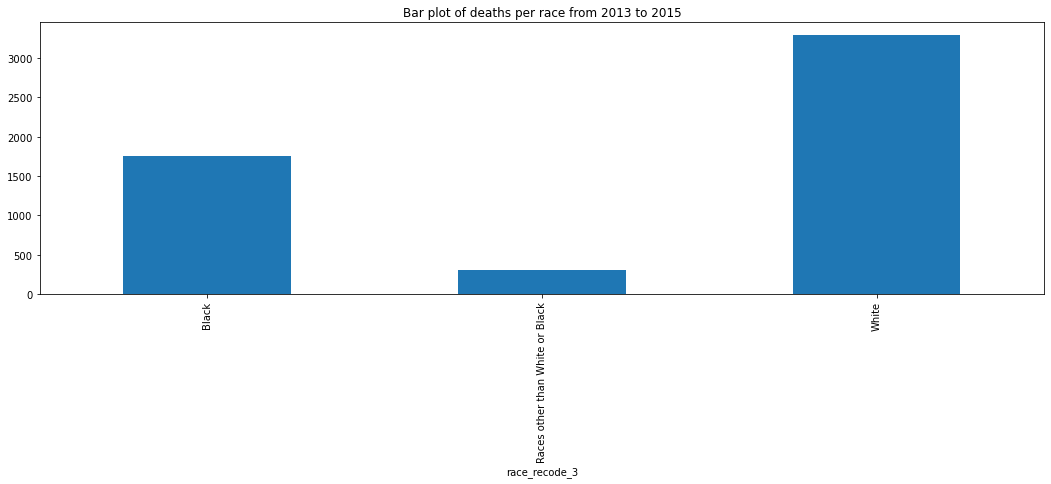

In [194]:
df_grouped_by_race.plot.bar(
    title=f'Bar plot of deaths per race from 2013 to 2015',
    figsize=(18,5)
)

# We Need to find total population of black/white women to see what's the maternal mortality percentage.
# If possible, do same analysis including hispanic, and same anaylisys excluding hispanic

In [195]:
# Find total population of USA separated by race.
# If possible by white/black/other and by hispanic and non hispanic.

In [196]:
# 1108 black women deaths
# 2113 white women deaths
# 196 other races deaths

column1 = 'race_recode_3'
column2 = 'place_of_death_patient_status'

df_grouped_by_race_and_death_place = df.groupby([column1, column2]).size()
df_grouped_by_race_and_death_place
# place_of_death_patient_status

race_recode_3                    place_of_death_patient_status     
Black                            Descendent's home                       34
                                 Hospital, clinc or Medical Center       31
                                 Hospital, clinic or Medical Center    1620
                                 Nursing home/long term care             22
                                 Other                                   40
                                 Place of death unknown                   2
Races other than White or Black  Descendent's home                        1
                                 Hospital, clinc or Medical Center        3
                                 Hospital, clinic or Medical Center     295
                                 Nursing home/long term care              2
                                 Other                                    7
White                            Descendent's home                       90
                    

In [197]:
df_non_hispanic = df[df["hispanic_origin"] == "Non – Hispanic"]

# Do different races die of the same causes, when compared with that same race population? Does this change when we include/exclude hispanics?

In [198]:
def create_race_heatmap(df, column):
    event_count_table = pd.crosstab(
        index=df['race_recode_3'],
        columns=df[column],
        normalize='index'
    )
    
    return sns.heatmap(event_count_table, cmap='Reds', linewidths=1.5)

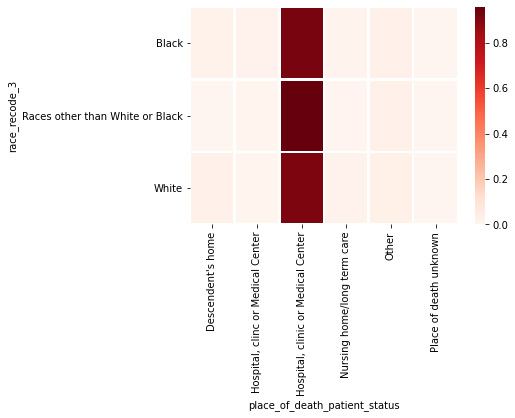

In [199]:
# with hispanics
create_race_heatmap(df, 'place_of_death_patient_status')

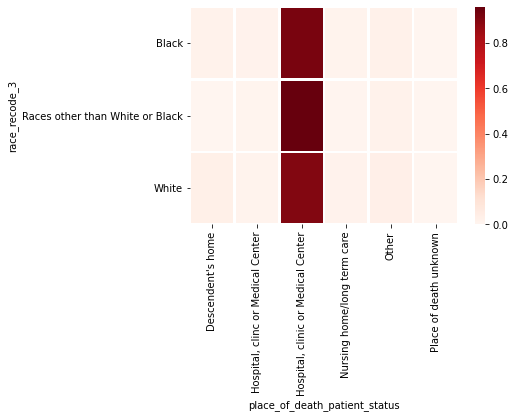

In [200]:
# 'Non – Hispanic'
create_race_heatmap(df_non_hispanic, 'place_of_death_patient_status')

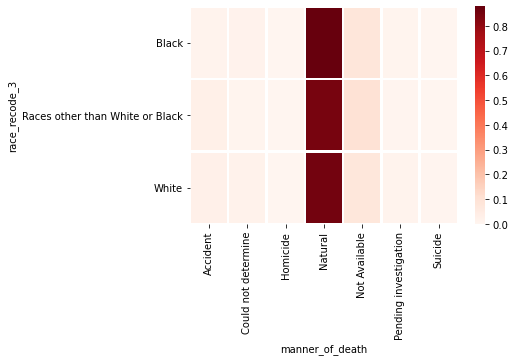

In [201]:
# hispanic
create_race_heatmap(df, 'manner_of_death')

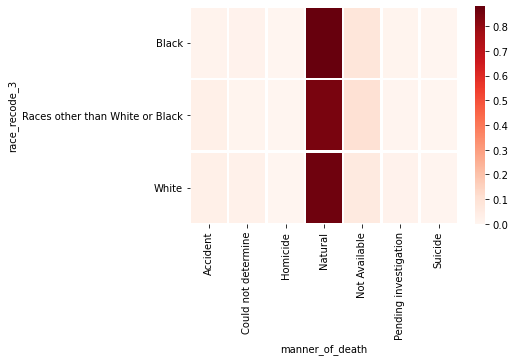

In [202]:
# non-hispanic
create_race_heatmap(df_non_hispanic, 'manner_of_death')

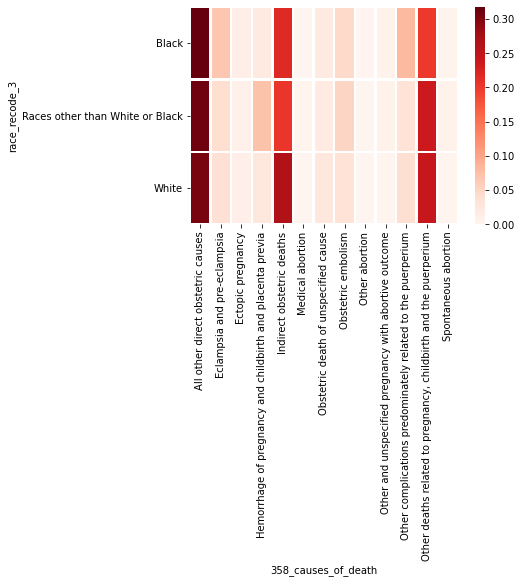

In [203]:
# with hispanics
create_race_heatmap(df, '358_causes_of_death')

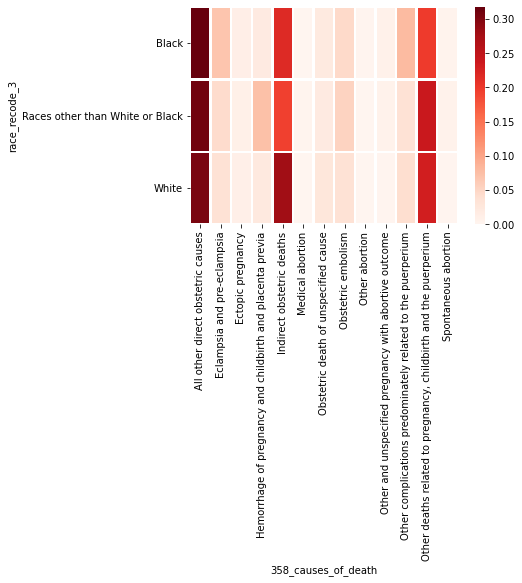

In [204]:
# without hispanics
create_race_heatmap(df_non_hispanic, '358_causes_of_death')

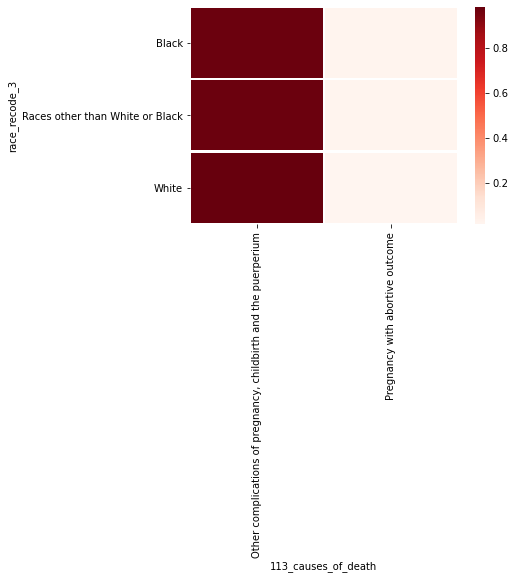

In [205]:
# without hispanics
create_race_heatmap(df_non_hispanic, '113_causes_of_death')

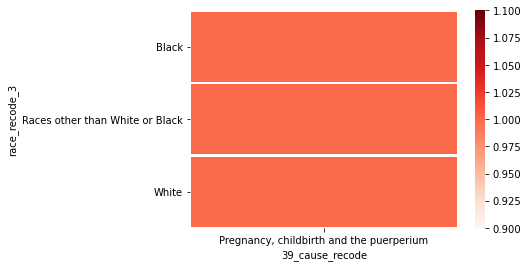

In [206]:
# without hispanics
create_race_heatmap(df_non_hispanic, '39_cause_recode')

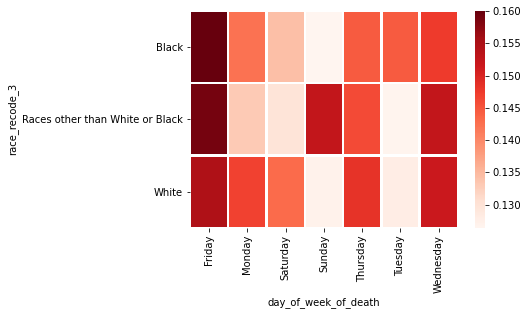

In [207]:
# with hispanics
create_race_heatmap(df, 'day_of_week_of_death')

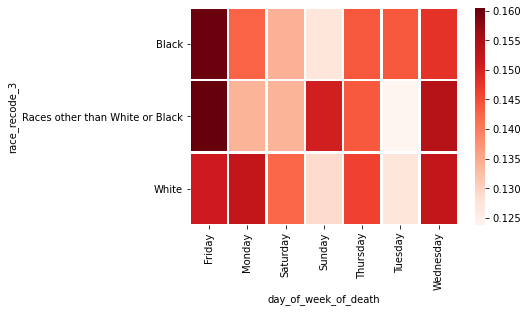

In [208]:
# non-hispanics
create_race_heatmap(df_non_hispanic, 'day_of_week_of_death')

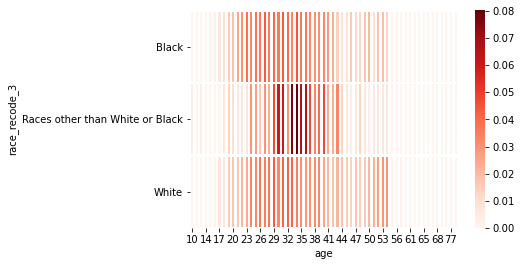

In [209]:
# with hispanics
create_race_heatmap(df_non_hispanic, 'age')

**The main causes of death seem to be the same for each race analyzed.  It might be worth to investigate further why black women die more of eclampsia and pre-eclampsia.**

# Is the percentage of missing data constant for different races, when compared with that same race population? Does this change when we include/exclude hispanics?

In [210]:
def get_na_numbers_per_race(df, race, column_name):
    df_race = df[df["race_recode_3"] == race]
    na_race = df_race[df[column_name] == 'Not Available']
    race_pct = len(na_race) / len(df_race)
    return race_pct

In [211]:
def compare_na_numbers_per_race(df, column_name):
    white = get_na_numbers_per_race(df, 'White', column_name)
    black = get_na_numbers_per_race(df, 'Black', column_name)
    other = get_na_numbers_per_race(df, 'Races other than White or Black', column_name)
        
    print(f'The number of N/A records for the column {column_name} are {white} for white, {black} for black, {other} for other races')

In [212]:
compare_na_numbers_per_race(df, 'manner_of_death')

The number of N/A records for the column manner_of_death are 0.07753116448768622 for white, 0.08176100628930817 for black, 0.10064935064935066 for other races


<ipython-input-210-98adcb215370>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_race = df_race[df[column_name] == 'Not Available']


In [213]:
compare_na_numbers_per_race(df_non_hispanic, 'manner_of_death')

The number of N/A records for the column manner_of_death are 0.06160572337042925 for white, 0.08092485549132948 for black, 0.10367892976588629 for other races


<ipython-input-210-98adcb215370>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_race = df_race[df[column_name] == 'Not Available']


In [214]:
# Finish missing values analysis

-----

In [215]:
df['level_of_education'].describe()

count     5346
unique      10
top        3.0
freq      1882
Name: level_of_education, dtype: object

In [216]:
df['level_of_education'].unique()

array(['Not Available', '4.0', 'no education item on certificate', '3.0',
       '5.0', '2003 revision of education item on certificate', '9.0',
       '6.0', '7.0', '8.0'], dtype=object)